In [25]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

# Load Model    

In [26]:
# Load the model
model = keras.models.load_model('fitmotion_model.keras')

c:\ProgramData\miniconda3\envs\tf_testing\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Loading The Data

In [27]:
labels = ['dws', 'jog', 'sit', 'std', 'ups', 'wlk']

In [28]:
# Load testing data
data_url = 'android_data/sensorfitmotion15_fit.csv'
df = pd.read_csv(data_url)
# df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Y,User Acceleration Z
0,0.308076,-0.35391,0.020503,-2.568041e-12,0.339375,-1.069692,-4.905698e-16,1.900811e-17,5.906077e-17,0.004364,0.003526,-0.010575
1,0.308076,-0.35391,0.020503,-2.579538e-12,0.339501,-1.069692,1.840202e-16,6.035266e-17,6.311518e-17,0.001773,0.003352,-0.001058
2,0.308076,-0.35391,0.020503,-2.617995e-12,0.340068,-1.069688,-2.470181e-16,2.845444e-17,-1.476882e-02,-0.000364,0.003466,-0.010583
3,0.308076,-0.35391,0.020503,-2.591129e-12,0.340307,-1.069687,4.687164e-16,2.376013e-17,-5.006198e-17,-0.000773,0.003428,-0.001058
4,0.308076,-0.35391,0.020503,-2.591129e-12,0.340307,-1.069687,4.687164e-16,2.376013e-17,-5.006198e-17,-0.000773,0.003428,-0.001058
...,...,...,...,...,...,...,...,...,...,...,...,...
827,0.297267,-0.37038,0.019698,-6.798647e-12,0.350043,-1.069633,-2.922319e-16,2.225949e-17,6.949345e-17,0.002409,0.003341,-0.010581
828,0.297267,-0.37038,0.019698,-6.798647e-12,0.350043,-1.069633,-2.922319e-16,2.225949e-17,6.949345e-17,0.005045,0.003287,-0.010585
829,0.297267,-0.37038,0.019698,-6.821448e-12,0.348621,-1.069639,4.604272e-16,6.425817e-17,-1.374708e-02,0.005045,0.003287,-0.010585
830,0.297267,-0.37038,0.019698,-6.821448e-12,0.348621,-1.069639,4.604272e-16,6.425817e-17,-1.374708e-02,0.000182,0.003358,-0.010564


In [29]:
# data comparison
# Load testing data
data_url_c = 'dataset/sit_13/sub_1.csv'
dfc = pd.read_csv(data_url_c)
dfc.drop('Unnamed: 0', axis=1, inplace=True)
dfc

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0.351138,-0.416302,-0.098023,0.314588,0.404381,-0.858784,-0.003655,0.009577,-0.000234,0.000094,0.000252,-0.006954
1,0.351219,-0.416372,-0.098025,0.314649,0.404445,-0.858732,-0.007937,0.007457,0.000807,-0.001309,0.002262,-0.010348
2,0.351145,-0.416497,-0.098045,0.314567,0.404560,-0.858708,-0.007960,-0.001053,-0.002387,-0.002174,0.000012,-0.006664
3,0.350849,-0.416695,-0.098148,0.314286,0.404740,-0.858726,-0.000521,-0.006411,-0.001261,0.001693,0.009216,-0.011575
4,0.350859,-0.416863,-0.098022,0.314271,0.404894,-0.858658,-0.001613,-0.004306,0.006206,0.005767,0.007490,-0.008926
...,...,...,...,...,...,...,...,...,...,...,...,...
10287,0.377830,-0.366861,0.131685,0.344357,0.358687,-0.867619,-0.008201,-0.002056,-0.032352,0.000004,0.007707,-0.003506
10288,0.377431,-0.367543,0.131037,0.343920,0.359324,-0.867528,-0.013541,-0.009469,-0.038790,-0.002688,0.006063,0.003011
10289,0.376842,-0.368708,0.130356,0.343255,0.360411,-0.867341,-0.002946,-0.016997,-0.030162,0.001548,0.019090,-0.007339
10290,0.376216,-0.369163,0.129790,0.342652,0.360835,-0.867403,0.021542,-0.017126,-0.019309,0.004180,0.016942,-0.019789


# Preprocessing Data

In [30]:
# Prepare the data
WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6
NUM_FEATURES = 12
BATCH_SIZE = 100
EPOCHS_SIZE = 10

In [31]:
from scipy.stats import mode

def sequence_generator(x, length, stride):
    seq_x = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        seq_x.append(input_sequence)
    return np.array(seq_x)

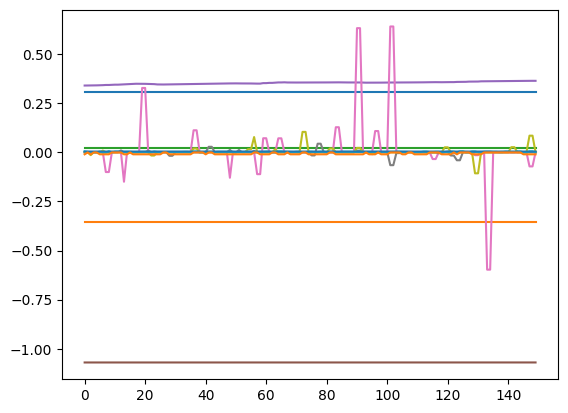

In [32]:
# Checking data
import matplotlib.pyplot as plt

tx = sequence_generator(df, WINDOW_LENGTH, STRIDE_LENGTH)
plt.plot(tx[0])
plt.show()

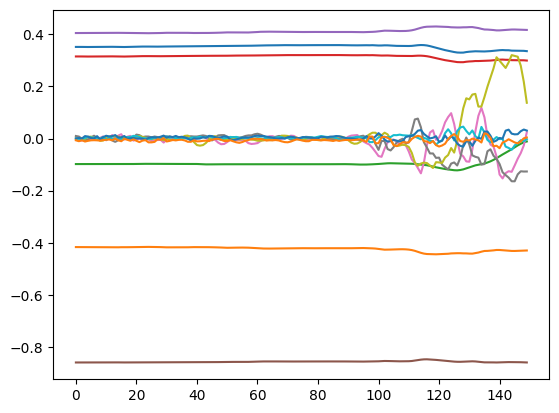

In [33]:
txc = sequence_generator(dfc, WINDOW_LENGTH, STRIDE_LENGTH)
plt.plot(txc[0])
plt.show()

# Prediction

In [34]:
# Predict the data
y_pred = model.predict(tx)

# Get the most frequent label
y_pred = np.argmax(y_pred, axis=1)
y_pred = mode(y_pred)[0]
labels[y_pred]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


'sit'